# DSGE Models

### Exercise 1

We find the value of A in the policy function.  
\begin{align*}
    K_{t+1} = Ae^z_t K_t^\alpha
\end{align*}
We know that Y is savings plus consumption.  So $Y_t = c_t + k_{t+1} = e^z_t K_t^\alpha$.  We guess $c_t = \phi Y_t$.  Then $k_{t+1} = (1 - \phi)Y_t$.  Then the Euler is:  

\begin{align*}
    \frac{1}{Y_t - Y_t + \phi Y_t} &= \beta E_t \Big \{ \frac{\alpha e^{x_t}(k_{t+1})^{\alpha - 1}}{\phi Y_{t+1}} \Big\} \\
    \implies \frac{1}{\phi e^z_t k_t^\alpha} &= \beta E_t \Big \{\frac{\alpha (k_{t+1})^{\alpha - 1}}{\phi k_{t+1}^\alpha} \Big\} \\
    \implies \frac{1}{\phi e^z_t k_t^\alpha} &= \beta \Big\{ \frac{\alpha}{\phi k_{t+1}} \Big\}  \\
    \implies k_{t+1} &= \beta \alpha e^z_t k_t^\alpha
\end{align*}

Thus $ A = \alpha \beta$


### Exercise 2

<number>
1. $c_t = $ Same as defined in notes
    
2. $\frac{1}{c_t} = \beta E_t \Big\{\frac{(r_{t+1} - \delta)(1 - \tau) + 1}{c_t} \Big\}$

3. $\frac{a}{1 - l_t} = \frac{w_t(1-\tau)}{c_t}$

4. $r_t = \alpha k_t^{\alpha - 1} e^{z_t} L_t^{1-\alpha}$

5. $w_t = (1 - \alpha)\frac{e^z_t k_t^\alpha}{L_t^\alpha}$

6. $T_t = $ Same as defined in notes.

7. $z_t = $ Same as defined in notes.


### Exercise 3

<number>
1. $c_t = $ Same as above
    
2. $\frac{1}{c_t^\gamma} = \beta E_t \Big\{\frac{(r_{t+1} - \delta)(1 - \tau) + 1}{c_t^\gamma} \Big\}$

3. $\frac{a}{1 - l_t} = \frac{w_t(1-\tau)}{c_t^\gamma}$

4. $r_t = $ Same as defined above.

5. $w_t = $ Same as defined above.

6. $T_t = $ Same as defined above.

7. $z_t = $ Same as defined above.

### Exercise 4

<number>
1. $c_t = $ Same as above.
    
2. $\frac{1}{c_t^\gamma} = \beta E_t \Big\{\frac{(r_{t+1} - \delta)(1 - \tau) + 1}{c_t^\gamma} \Big\}$

3. $\frac{a}{(1 - l_t)^\xi} = \frac{w_t(1-\tau)}{c_t^\gamma}$

4. $r_t = e^z_t(\alpha k_t^\eta + (1- \alpha)L_t^\eta)^{\frac{1 - \eta}{\eta}}(1 - \alpha)L_t^{\eta - 1}$ 

5. $w_t = e^z_t (\alpha k_t^\eta + (1 - \alpha)L_t^\eta)^{\frac{1- \eta}{\eta}}\alpha k_t^{\eta - 1}$

6. $T_t = $ Same as defined above.

7. $z_t = $ Same as defined above.

## Exercise 5


Characteristic EQ
<number>
1. $c_t = $ Same as above. 
    
2. $\frac{1}{c_t^\gamma} = \beta E_t \Big\{\frac{(r_{t+1} - \delta)(1 - \tau) + 1}{c_t^\gamma} \Big\}$

4. $r_t = \alpha (\frac{L_t e^{z_t}}{k_t}^{1 - \alpha} $ 

5. $w_t = (1 - \alpha)(\frac{k_t}{L_t e^{z_t}})^\alpha$

6. $T_t = \tau [w_t + (r_t - \delta)k_t]$

7. $z_t = (1 - p_z)\tilde z + p_z z_{t - 1} + \epsilon_t^z$

Steady State - there is a bar on every time parameter
<number>
1. $c = [w + (r - \delta)k]$
    
2. $\frac{1}{c^\gamma} = \beta  \Big\{\frac{(r - \delta)(1 - \tau) + 1}{c^\gamma} \Big\}$

4. $r = \alpha (\frac{L e^{z}}{k})^{1 - \alpha} $ 

5. $w = (1 - \alpha)(\frac{k}{L e^{z}})^\alpha$

6. $T = \tau [w + (r - \delta)k]$

7. $z = 0$

We note that $ L = 1$ we solve by solving for $r$ from the euler equation and then plugging that into cbar, along with wbar.  We then solve for kbar.  This is solved out and this solved out function can be seen in raw form below.

In [1]:
import numpy as np
import scipy.optimize as opt

In [2]:
# Parameters
gamma = 2.5
beta = 0.98
alpha = 0.40
delta = 0.10
zbar = 0
tao = 0.05
Lbar = 1

In [3]:
# Numerical Solutions
def Error_Euler(steadystate, *arguments):
    gamma, beta, alpha, delta, zbar, tao, Lbar = arguments
    cbar = steadystate[0]
    kbar = steadystate[1]
    
    rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)

    error_1 = 1/(cbar ** gamma) - beta* ((rbar - delta)*(1 - tao) + 1) / ((cbar)**gamma)
    
    error_2 = -cbar + ((1-alpha)*(kbar/(np.e **zbar))**alpha + (alpha*(np.e ** zbar / kbar) ** (1 - alpha) - delta)* kbar)
    
    return np.array([error_1, error_2])


In [4]:
# Solve for steady state consumption and kapital
arguments = gamma, beta, alpha, delta, zbar, tao, Lbar
kbarguess = .5
cbarguess = .5
solution = opt.root(Error_Euler, [cbarguess, kbarguess], args=arguments, tol=1e-8)
cbar, kbar = solution.x
cbar, kbar

(1.4845048188586933, 7.287497951065252)

In [5]:
# algebraic solutions

In [6]:
# steady state captial
kbar = ((1 - tao)*beta*alpha)**(1/(1 - alpha))*(np.e**zbar) * Lbar / ((1 - beta + delta*(1 - tao)*beta)**(1/(1 - alpha)))
kbar

7.2874979506929884

In [7]:
#Solve for return on captial
rbar = (1 -beta) / (beta * (1 - tao)) + delta
rbar

0.1214822771213749

In [8]:
# Solve for wages
wbar = (1 - alpha)*(kbar / (Lbar*np.e ** zbar))**alpha
wbar

1.3279527683513057

In [9]:
# Solve for consumption and taxation
cbar = (wbar + (rbar - delta)*kbar)
Tbar = tao*(wbar + (rbar - delta)*kbar)
cbar, Tbar

(1.484504818849544, 0.0742252409424772)

In [10]:
# Solve for investment
ibar = kbar - (1 - delta)*kbar
ibar

0.7287497950692989

In [11]:
# Solve for output
ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)
ybar

2.213254613918843

## Exercise 6 

Characteristic EQ
<number>
1. $c_t = $ Same as above. 
    
2. $\frac{1}{c_t^\gamma} = \beta E_t \Big\{\frac{(r_{t+1} - \delta)(1 - \tau) + 1}{c_t^\gamma} \Big\}$

3. $\frac{a}{(1 - l_t)^\xi} = \frac{w_t(1-\tau)}{c_t^\gamma}$

4. $r_t = \alpha (\frac{L_t e^{z_t}}{k_t}^{1 - \alpha} $ 

5. $w_t = (1 - \alpha)(\frac{k_t}{L_t e^{z_t}})^\alpha$

6. $T_t = \tau [w_t + (r_t - \delta)k_t]$

7. $z_t = (1 - p_z)\tilde z + p_z z_{t - 1} + \epsilon_t^z$


Steady State

1. $c = [w + (r - \delta)k]$
    
2. $\frac{1}{c^\gamma} = \beta  \Big\{\frac{(r - \delta)(1 - \tau) + 1}{c^\gamma} \Big\}$

3. $\frac{a}{(1 - l)^\xi} = \frac{w(1-\tau)}{c^\gamma}$

4. $r = \alpha (\frac{L e^{z}}{k})^{1 - \alpha} $ 

5. $w = (1 - \alpha)(\frac{k}{L e^{z}})^\alpha$

6. $T = \tau [w + (r - \delta)k]$

7. $z = 0$


In [12]:
gamma = 2.5
xi = 1.5
beta = .98
alpha = 0.40
a = 0.5
delta = 0.10
zbar = 0
tao = 0.05

In [13]:
# Numerical Solutions
    
def Error_Euler_2(steadystate, *arguments):
    gamma, xi, beta, alpha, a, delta, zbar, tao = arguments
    cbar = steadystate[0]
    kbar = steadystate[1]
    l_bar = steadystate[2]
    
    rbar = alpha * ((l_bar * np.e ** zbar) / kbar) ** (1 - alpha)
    wbar = (1 - alpha) * (kbar / (l_bar * np.e ** zbar)) ** alpha * (np.e **zbar)
    
    error_1 = (1/(cbar ** gamma)) - beta * (((rbar - delta)*(1 - tao) + 1) / ((cbar)**gamma))
    
    error_2 = (a) / ((1 - l_bar) ** xi) - (wbar * (1 - tao)) / (cbar ** gamma)
    
    error_3 = (cbar) - (wbar * l_bar + (rbar - delta) * kbar)
   
    return np.array([error_1, error_2, error_3])

In [14]:
# Solve for steady state consumption, capital, and labor
arguments = gamma, xi, beta, alpha, a, delta, zbar, tao
kbarguess = .5
cbarguess = .5
lbarguess = .5
solution = opt.root(Error_Euler_2, [cbarguess, kbarguess, lbarguess], args=arguments, tol=1e-8)
cbar, kbar, Lbar = solution.x
cbar, kbar, Lbar

(0.8607032061541214, 4.225229026778794, 0.5797914531669064)

In [15]:
# Solve for steady state wages and return on capital
wbar = (1 - alpha) * (kbar / (Lbar * np.e ** zbar)) ** alpha * (np.e **zbar)
rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)
wbar, rbar

(1.3279527683507593, 0.12148227712144986)

In [16]:
# Solve for taxation
Tbar = tao * cbar
Tbar

0.04303516030770607

In [17]:
# Solve for investment
ibar = kbar - (1 - delta)*kbar
ibar

0.4225229026778794

In [18]:
# Solve for Output
ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)
ybar

1.2832261088318382

# Linearization Notes

## Exercise 1

The analyticall values of F, G, H, L, M, and N are already given in the notes 1.4.

In [20]:
%reset
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Parameters
alpha =0.35
beta = 0.98
rho = 0.95
sigma = 0.02
A = beta * alpha
Kbar = A ** (1 /(1 - alpha))

F = (alpha * Kbar ** ( alpha - 1)) / (Kbar ** alpha - Kbar)
G = - (alpha * Kbar ** (alpha - 1)*(alpha + Kbar ** (alpha - 1))) / (Kbar ** alpha - Kbar)
H = (alpha ** 2 * Kbar ** (2*(alpha - 1))) / (Kbar ** alpha - Kbar)
L = - (alpha * Kbar ** (2 * alpha - 1)) / (Kbar ** alpha - Kbar)
M = (alpha ** 2 * Kbar ** (2*(alpha - 1))) / (Kbar ** alpha - Kbar)
N = rho
# Not sure why N = rho and we only use P2 and not P1 but everyone else is doing it.
P1 = (- G + np.sqrt(G*G - 4*F*H)) / (2*F)
P2 = (- G - np.sqrt(G*G - 4*F*H)) / (2*F)
Q = - (L*N + M) / (F * N + F * P2 + G)
zbar = 0
print("This is P and Q.  P: ", P2, " and Q: ", Q)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
This is P and Q.  P:  0.35  and Q:  0.24750650674493596


In [21]:
def find_K_tp1(Kbar, P, Q, K, z):
    return Kbar + P*(K - Kbar) + Q*z 

def pol_fun_graph(Kbar, P, Q):
    """Plot the policy function.  Which is given in the lecture notes."""
    kspace = np.linspace(Kbar * 0.5, Kbar* 1.5, 200)
    zspace = np.linspace( -1, 1, 200)
    kt, zt = np.meshgrid(kspace, zspace)
    ktp1 = np.empty((200, 200))
    for i in range(200):
        for j in range(200):
            ktp1[i, j] = find_K_tp1(Kbar, P, Q, kspace[i], zspace[i])
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')
    #ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(kt, zt, ktp1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.xlabel('K_t')
    plt.ylabel('Z_t')
    plt.title("Policy Function")
    plt.show()

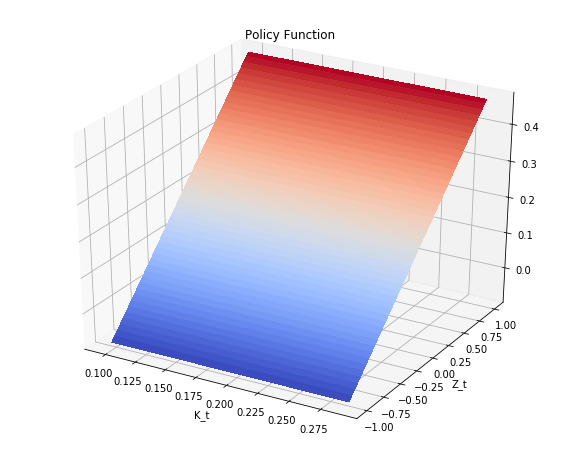

In [22]:
pol_fun_graph(Kbar, P2, Q)

### Exercise 2:


I'm confused on what we are supposed to do.

### Exercise 3:

I did this by hand. But after writing the first line in code, I realized it wasn't worth my Saturday night and so I copied the Proof from Tim. 

$ 0 = E_t \Big\{ F \tilde{X}_{t+1} + G  \tilde{X}_{t} + H \tilde{X}_{t-1} + L \tilde{Z}_{t+1} + M \tilde{Z}_{t} \Big\}$

$ 0 = E_t \Big\{ F P \tilde{X}_t + F Q \tilde{Z}_{t+1} + G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + L N \tilde{Z}_t + L \varepsilon_{t+1} + M \tilde{Z}_t \Big\}$

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M \tilde{Z}_t \Big\} $

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}+ 
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M\tilde{Z}_t \Big\}$
    
$= F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t +
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + M\tilde{Z}_t $
    
$= (F P^2 + GP + H) \tilde{X}_{t-1} + (F P Q + F Q N + G Q + LN + M) \tilde{Z}_t $

$= ((F P + G)P + H) \tilde{X}_{t-1} + ((FQ + L)N + (FP + G)Q + M) \tilde{Z}_t $

### Exercise 4:

This Problem is Exercise 6 from DSGE.

In [23]:
# Parameters
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.1
zbar = 0
p_z = 0.9
tao = 0.05

In [24]:
#Solve for k, c, r, w, l, T, y, i
#u = (c ** (1 - gamma) - 1) / ( 1 - gamma) + a * ((1 - l) ** (1 - xi) - 1) / (1 - xi)
#F = K ** alpha * (L * np.e ** z) ** (1 - alpha)

# Numerical Solutions
    
def Error_Euler_2(steadystate, *arguments):
    #gamma, xi, beta, alpha, a, delta, zbar, tao = arguments
    cbar = steadystate[0]
    kbar = steadystate[1]
    l_bar = steadystate[2]
    
    rbar = alpha * ((l_bar * np.e ** zbar) / kbar) ** (1 - alpha)
    wbar = (1 - alpha) * (kbar / (l_bar * np.e ** zbar)) ** alpha * (np.e **zbar)
    
    error_1 = (1/(cbar ** gamma)) - beta * (((rbar - delta)*(1 - tao) + 1) / ((cbar)**gamma))
    
    error_2 = (a) / ((1 - l_bar) ** xi) - (wbar * (1 - tao)) / (cbar ** gamma)
    
    error_3 = (cbar) - (wbar * l_bar + (rbar - delta) * kbar)
   
    return np.array([error_1, error_2, error_3])

In [25]:
# Solve for steady state consumption, capital, and labor
arguments = gamma, xi, beta, alpha, a, delta, zbar, tao
kbarguess = .5
cbarguess = .5
lbarguess = .5
solution = opt.root(Error_Euler_2, [cbarguess, kbarguess, lbarguess], args=arguments, tol=1e-8)
cbar, kbar, Lbar = solution.x


In [26]:
# Solve for steady state wages and return on capital
wbar = (1 - alpha) * (kbar / (Lbar * np.e ** zbar)) ** alpha * (np.e **zbar)
rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)
# Solve for taxation
Tbar = tao * cbar
# Solve for investment
ibar = kbar - (1 - delta)*kbar
# Solve for Output
ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)

#Solve for k, c, r, w, l, T, y, i
print(" Kbar: ", kbar, "\n cbar: ", cbar, " \n rbar: ", rbar, 
     "\n wbar: ", wbar, "\n Lbar: ", Lbar, " \n Tbar: ", Tbar,
     "\n ybar: ", ybar, "\n ibar: ", ibar)

 Kbar:  4.225229026778794 
 cbar:  0.8607032061541214  
 rbar:  0.12148227712144986 
 wbar:  1.3279527683507593 
 Lbar:  0.5797914531669064  
 Tbar:  0.04303516030770607 
 ybar:  1.2832261088318382 
 ibar:  0.4225229026778794


### Exercise 5:

In [27]:
def derivative(f, x, xtilde):
    return (steadystates(x) - f(xtilde)) / np.sum(x - xtilde)

def steadystates(*params):
#    gamma, xi, beta, alpha, a, delta, zbar, tao = params
    kbarguess = .5
    cbarguess = .5
    lbarguess = .5
    solution = opt.root(Error_Euler_2, [cbarguess, kbarguess, lbarguess], args=params, tol=1e-8)
    cbar, kbar, Lbar = solution.x
    wbar = (1 - alpha) * (kbar / (Lbar * np.e ** zbar)) ** alpha * (np.e ** zbar)
    rbar = alpha * ((Lbar * np.e ** zbar) / kbar) ** (1 - alpha)
    Tbar = tao * cbar
    ibar = kbar - (1 - delta)*kbar
    ybar = kbar ** alpha * (Lbar * np.e ** zbar) ** (1 - alpha)
    return np.array([cbar, kbar, Lbar, wbar, rbar, Tbar, ibar, ybar])

params = np.array([delta, tao, zbar, alpha, gamma, xi, beta, a])
eps = 1e-6
der_matrix = np.zeros((8, len(params)))
for i in range(8):
    for j in range(len(params)):
        paramstilde = np.array([delta, tao, zbar, alpha, gamma, xi, beta, a])
        paramstilde = params[j] + eps
        der_matrix[i, j] = (steadystates(params)[i] - steadystates(paramstilde)[i]) / eps
print(der_matrix)

 #my code isn't working. It doesn't register the the epsilon change for the steady states.


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Exercise 6

In [28]:
...

Ellipsis

# Perturbation Methods

## Exercise 1

We take the derivative of equation 5 with respect to u.  It gets ugly quick but it gives us $x_{uuu}(u_0)$ as a function of the derivatives of the F function and the lower order derrivatives of the x function, if we solve for it.  

## Exercise 2 

In [29]:
%reset
import numpy as np
import scipy 
from matplotlib import pyplot as plt
from scipy import optimize as opt
import sympy as sy

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [30]:
alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

def nd(alpha, z, w, k):
    return (((1-alpha)*z)/w) ** (1 / alpha) * k
def profit(alpha, z, w, k):
    return (z * k ** alpha * nd(alpha, z, w, k) ** (1 - alpha) - w * nd(alpha, z, w, k))
def ns(alpha, z, w, k, h, b, t):
    return (h - ((b)/(w*(1 + b)))*(w*h + profit(alpha, z, w, k) - t))

In [31]:
def error(w, *params):
    return nd(alpha, z, w, k) - ns(alpha, z, w, k, h, b, t)
w0= 0.5
mrkt_clear = opt.fsolve(error, w0, [alpha, z, k, h, b, t])
#Print the market clearing wage
mrkt_clear

array([0.62736178])

In [32]:
k = sy.Symbol('k')

def function_mkc(k, alpha, z, w, h, b, t):
    return nd(alpha, z, w, k) - ns(alpha, z, w, k, h, b, t)

def factorial(n):
    if n <=0:
        return 1
    else:
        return n*factorial(n-1)

def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(k,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

In [33]:
x_lims = [1,15]
x1 = np.linspace(x_lims[0],x_lims[1],100)
y1 = []
func = taylor(function_mkc,5,1)
print('Taylor expansion at n='+str(1),func)
for ii in x1:
    y1.append(func.subs(k,ii))
plt.plot(x1,func,label='order '+str(1))
y1 = []
# Plot the function to approximate (sine, in this case)
#     plt.plot(x1,np.sin(x1),label='sin of x')
#     plt.xlim(x_lims)
#     plt.ylim([-5,5])
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.legend()
#     plt.grid(True)
#     plt.title('Taylor series approximation')
plt.show()


AttributeError: 'function' object has no attribute 'diff'

I keep getting the same error.  After looking at other people's code and getting help, I realized I should have probably just hardcoded the derivatives in and not used the symbolic "sympy".  Instead of rewriting the whole function to get working code, I've decided to keep my originalish code (the taylor function was from online) and use the hard code of derivatives in the next problem.

## Exercise 3:
Thanks to Tim Munday, which this problem's code is based on.  It's still not working though, and I can't find the difference.  I've changed so much of the code it's basically a copy of Tim's now. But still not working. 

In [34]:
%reset
import numpy as np
import scipy 
from matplotlib import pyplot as plt
from scipy import optimize as opt
import sympy as sy


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
def error(x, y):
    err = (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
    return err

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)

def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

def y_find(x):
    y = opt.fsolve(error, 50, x, xtol=1e-9)
    return y


/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


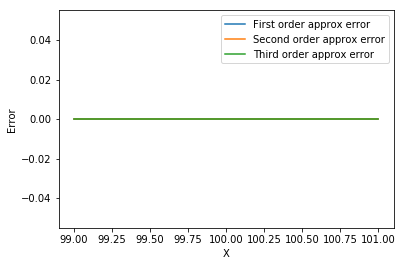

In [36]:
# Approximations
xspace = np.linspace(99, 101, 100)

fo_app_x = first_approx(y_find, 100, xspace)
so_app_x = second_approx(y_find, 100, xspace)
tho_app_x = third_approx(y_find, 100, xspace)
xfun = np.zeros(100)
for i in range(len(xspace)):
    xfun[i] = y_find(xspace[i])

error1 = xfun - fo_app_x
error2 = xfun - so_app_x
error3 = xfun - tho_app_x
    
plt.figure()
plt.plot(xspace, error1, label='First order approx error')
plt.plot(xspace, error2, label='Second order approx error')
plt.plot(xspace, error3, label ='Third order approx error')
plt.legend()
plt.xlabel('X')
plt.ylabel('Error')

plt.show()

In [37]:
error1 == error2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])